In [37]:
# ! pip install bertopic
# ! pip install spacy
# ! pip install minisom

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns   
import matplotlib.pyplot as plt
from bertopic import BERTopic
from tqdm import tqdm

# the following code ensures that you can see your (print) results for multiple tasks within a coding block
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.options.display.width = None

C:\Users\Lap-5\miniconda3\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\Lap-5\miniconda3\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\Lap-5\miniconda3\lib\site-packages\umap\distances.py:1086: NumbaDeprecationWarning: The 'nopython' ke

Question 1: Load in the provided dataset and summarize the basic statistics. Specifically your code should answer:

1) What are the feature types and their basic statistics (using describe(include='all'))
2) How many features have missing values? 

In [2]:
# load data as dataframe
df = pd.read_csv("sampled_arxiv_cs.csv")
df.head()

C:\Users\Lap-5\AppData\Local\Temp\ipykernel_18552\2152466153.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("sampled_arxiv_cs.csv")


,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,2006.15607,Youngwan Lee,"Youngwan Lee, Joong-won Hwang, Hyung-Il Kim, K...",Localization Uncertainty Estimation for Anchor...,NaN,NaN,NaN,NaN,cs.CV,http://arxiv.org/licenses/nonexclusive-distrib...,"Since many safety-critical systems, such as ...","[{'version': 'v1', 'created': 'Sun, 28 Jun 202...",2022-07-07,"[['Lee', 'Youngwan', ''], ['Hwang', 'Joong-won..."
1,1507.03782,Helmut Strobel,"Helmut Strobel, Wolfgang Muessel, Daniel Linne...",Fisher Information and entanglement of non-Gau...,"5 pages, 4 figures, 7 pages supplementary mate...","Science 345, 424-427 (2014)",10.1126/science.1250147,NaN,quant-ph cond-mat.quant-gas physics.atom-ph,http://arxiv.org/licenses/nonexclusive-distrib...,Entanglement is the key quantum resource for...,"[{'version': 'v1', 'created': 'Tue, 14 Jul 201...",2015-07-15,"[['Strobel', 'Helmut', ''], ['Muessel', 'Wolfg..."
2,901.4201,Stephane Martin,"Denis Lugiez (LIF), St\'ephane Martin (LIF)",Peer to Peer Optimistic Collaborative Editing ...,NaN,NaN,NaN,NaN,cs.DS,http://arxiv.org/licenses/nonexclusive-distrib...,Collaborative editing consists in editing a ...,"[{'version': 'v1', 'created': 'Tue, 27 Jan 200...",2009-01-28,"[['Lugiez', 'Denis', '', 'LIF'], ['Martin', 'S..."
3,1802.05814,Dawen Liang,"Dawen Liang, Rahul G. Krishnan, Matthew D. Hof...",Variational Autoencoders for Collaborative Fil...,"10 pages, 3 figures. WWW 2018",NaN,NaN,NaN,stat.ML cs.IR cs.LG,http://arxiv.org/licenses/nonexclusive-distrib...,We extend variational autoencoders (VAEs) to...,"[{'version': 'v1', 'created': 'Fri, 16 Feb 201...",2018-02-19,"[['Liang', 'Dawen', ''], ['Krishnan', 'Rahul G..."
4,1010.5069,Philippe Maincon,Philippe Maincon,A Wiener-Laguerre model of VIV forces given re...,NaN,NaN,NaN,NaN,physics.flu-dyn,http://arxiv.org/licenses/nonexclusive-distrib...,Slender structures immersed in a cross flow ...,"[{'version': 'v1', 'created': 'Mon, 25 Oct 201...",2010-10-26,"[['Maincon', 'Philippe', '']]"


In [3]:
# show basic information
df.info()

# show basic statistics
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              50000 non-null  object
 1   submitter       49959 non-null  object
 2   authors         50000 non-null  object
 3   title           50000 non-null  object
 4   comments        31780 non-null  object
 5   journal-ref     10783 non-null  object
 6   doi             15365 non-null  object
 7   report-no       1170 non-null   object
 8   categories      50000 non-null  object
 9   license         47468 non-null  object
 10  abstract        50000 non-null  object
 11  versions        50000 non-null  object
 12  update_date     50000 non-null  object
 13  authors_parsed  50000 non-null  object
dtypes: object(14)
memory usage: 10.7+ MB


,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
count,50000,49959,50000,50000,31780,10783,15365,1170,50000,47468,50000,50000,50000,50000
unique,50000,40229,48953,49998,23292,10709,15362,1157,8908,9,49996,49984,3955,48801
top,2006.15607,EPTCS,Lorenzo Iorio,Achieving the Secrecy Capacity of Wiretap Chan...,12 pages,"Dans Design, Automation and Test in Europe - D...",10.1021/jp806464p,ISSN 1947 5500,cs.CV,http://arxiv.org/licenses/nonexclusive-distrib...,This paper has been withdrawn.\n,"[{'version': 'v1', 'created': 'Wed, 27 Jun 201...",2007-05-23,"[['Iorio', 'Lorenzo', '']]"
freq,1,216,11,2,121,7,2,8,3105,36525,2,7,1016,11


In [4]:
# check features with missing values
df.isnull().any()

id                True
submitter         True
authors           True
title             True
comments          True
journal-ref       True
doi               True
report-no         True
categories        True
license           True
abstract          True
versions          True
update_date       True
authors_parsed    True
dtype: bool

- Summarize our answers to Q1 below, based on our analysis:
    - The feature types are "object" for all features.
    - All features(14 features) have missing values.

Question 2: Preprocess the abstracts of the papers in the provided data corpus. Apply bertopic on the abstracts and explain the topics you received and discuss the quality of the topics and determine what is the best topic number for abstracts you found out.

In [5]:
# remove missing values from "abstract" feature
df.dropna(subset=["abstract"], inplace=True)

In [7]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS 

from IPython.utils import io
# with io.capture_output() as captured:
#     !pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_core_sci_lg-0.4.0.tar.gz
    
import en_core_sci_lg  # import downlaoded model
import string
from minisom import MiniSom  
from sklearn.cluster import SpectralClustering 
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS 

In [8]:
# Now let's create a tokenizer 
parser = en_core_sci_lg.load()
parser.max_length = 100000 #Limit the size of the parser
punctuations = string.punctuation #list of punctuation to remove from text
stopwords = list(STOP_WORDS)


def spacy_tokenizer(sentence):
    ''' Function to preprocess text of scientific papers 
        (e.g Removing Stopword and puntuations)'''
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ] # transform to lowercase and then split the scentence
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ] #remove stopsword an punctuation
    mytokens = " ".join([i for i in mytokens]) 
    return mytokens

In [9]:
# Apply the tokenizer to process title, we will use the processed_text as the input for clustering task.
tqdm.pandas()

# Function to handle float values in the "abstract" column
def handle_float_value(value):
    if isinstance(value, float):
        return str(value)  # Convert float to string
    return value

# Apply the tokenizer to the "abstract" column
df["processed_text"] = df["abstract"].apply(handle_float_value).progress_apply(spacy_tokenizer)


100%|██████████| 50000/50000 [22:00<00:00, 37.87it/s]


In [10]:
# now let's create a topic model using BERTopic 

# since we have quite a lot data points, let's start with a large topic number (50) and see how coherent are the learned topics.
topic_model = BERTopic(verbose=True, embedding_model="paraphrase-MiniLM-L6-v2", min_topic_size=50)
topics, _ = topic_model.fit_transform(df["processed_text"].to_numpy()); len(topic_model.get_topic_info())

Batches:   0%|          | 0/1563 [00:00<?, ?it/s]

2023-06-05 16:11:52,576 - BERTopic - Transformed documents to Embeddings
2023-06-05 16:12:35,940 - BERTopic - Reduced dimensionality
2023-06-05 16:12:40,129 - BERTopic - Clustered reduced embeddings


95

In [13]:
# explore the topics generated.
topic_model.get_topic_info().head(10)
topic_model.visualize_barchart(top_n_topics=10, height=700)
topic_model.visualize_topics(top_n_topics=10)
topic_model.visualize_topics(top_n_topics=50)
topic_model.visualize_hierarchy(top_n_topics=10, width=800)
topic_model.visualize_heatmap(n_clusters=5, top_n_topics=50)


,Topic,Count,Name,Representation,Representative_Docs
0,-1,24280,-1_use_model_method_datum,"[use, model, method, datum, propose, problem, ...",[supervised transfer learning tl receive consi...
1,0,2562,0_language_word_speech_text,"[language, word, speech, text, model, task, se...",[continuous word representation train large un...
2,1,1573,1_channel_interference_antenna_wireless,"[channel, interference, antenna, wireless, use...",[work consider downlink multi-cell multiple-in...
3,2,1050,2_image_segmentation_imaging_medical,"[image, segmentation, imaging, medical, ct, mr...",[image segmentation important task medical app...
4,3,989,3_attack_adversarial_security_defense,"[attack, adversarial, security, defense, attac...",[real-world deep learning model develop time s...
5,4,787,4_logic_program_calculus_proof,"[logic, program, calculus, proof, language, se...",[conference hold marseille 1982 iclp premier i...
6,5,691,5_graph_vertex_edge_log,"[graph, vertex, edge, log, algorithm, problem,...",[study cross-graph charge scheme graph draw pl...
7,6,657,6_equation_numerical_method_solution,"[equation, numerical, method, solution, scheme...",[computationally efficient method solve three-...
8,7,640,7_robot_robotic_human_object,"[robot, robotic, human, object, control, task,...",[design control robot play equally important r...
9,8,604,8_flow_turbulence_turbulent_velocity,"[flow, turbulence, turbulent, velocity, fluid,...",[use lagrangian transport momentum reynolds sh...


In [20]:
# show number of topics
print(f"number of topics: {len(pd.value_counts(topics)) - 1}")

number of topics: 94


- We will explain the top 5 topics we got:
    - topic 0: speech recognition
    - topic 1: communications
    - topic 2: object detection
    - topic 3: cyber security
    - topic 4: maths

- Summarize our answers to Q2 below, based on our analysis:
    - We got 94 topics. 
    - We noticed that number of samples that don't belong to any topic (-1 has 24280 samples).
    - topic(0) that is the largest one, it has (2562) samples.
    - Most of topics are overlapped as it's illustrated above.
- We will try another trial to get a good number of labels that fits the data.

In [23]:
# now let's create a topic model using BERTopic 

# since we have quite a lot data points, let's start with a large topic number (50) and see how coherent are the learned topics.
topic_model = BERTopic(verbose=True, embedding_model="paraphrase-MiniLM-L6-v2", min_topic_size=150)
topics, _ = topic_model.fit_transform(df["processed_text"].to_numpy()); len(topic_model.get_topic_info())

Batches:   0%|          | 0/1563 [00:00<?, ?it/s]

2023-06-05 17:16:50,618 - BERTopic - Transformed documents to Embeddings
2023-06-05 17:17:11,166 - BERTopic - Reduced dimensionality
2023-06-05 17:17:16,290 - BERTopic - Clustered reduced embeddings


40

In [24]:
# explore the topics generated.
topic_model.get_topic_info().head(10)
topic_model.visualize_barchart(top_n_topics=10, height=700)
topic_model.visualize_topics(top_n_topics=10)
topic_model.visualize_topics(top_n_topics=50)
topic_model.visualize_hierarchy(top_n_topics=10, width=800)
topic_model.visualize_heatmap(n_clusters=5, top_n_topics=50)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,23279,-1_model_use_method_datum,"[model, use, method, datum, propose, problem, ...",[planning powerful approach control problem kn...
1,0,3490,0_optical_laser_atom_mode,"[optical, laser, atom, mode, light, state, fie...",[nonlinear metasurface holography great potent...
2,1,2461,1_language_model_speech_word,"[language, model, speech, word, task, text, se...",[introduce approach multilingual speech synthe...
3,2,2036,2_channel_network_user_wireless,"[channel, network, user, wireless, interferenc...",[paper consider random access system sender mo...
4,3,1931,3_flow_fluid_particle_equation,"[flow, fluid, particle, equation, velocity, mo...",[turbulent flow maintain external supply kinet...
5,4,1108,4_plasma_magnetic_solar_field,"[plasma, magnetic, solar, field, electron, ion...",[paper study weakly-compressive high-frequency...
6,5,993,5_detector_beam_neutron_neutrino,"[detector, beam, neutron, neutrino, energy, ex...",[traditional thermal neutron detector base hel...
7,6,873,6_software_student_research_citation,"[software, student, research, citation, scienc...",[software estimation important activity softwa...
8,7,840,7_attack_adversarial_security_defense,"[attack, adversarial, security, defense, malwa...",[industrial internet thing i-iot collaboration...
9,8,813,8_logic_program_proof_calculus,"[logic, program, proof, calculus, language, ty...",[hoare logic proof system allow formally estab...


In [25]:
# show number of topics
print(f"number of topics: {len(pd.value_counts(topics)) - 1}")

number of topics: 39


- As we increase "min_topic_size" we get lesser number of topics.
- We tried to increase this hyperparameter (min_topic_size = 150) and we got a good number of topics, it's (39) topics, where topics are less overlapped, comparing with our first trial.
- We got lesser number of samples that don't belong to any topic (-1 has 23279 samples).
- topic(0) that is the largest one, it has (3490) samples.

Question 3: Compare the topics learned by BERTopic with the original categories of the papers. 
For instance, you can pick one popular category, such as cs.CV, and check how those papers belong to this category are cateogrized by your topic model learned in previous step. 

- We will compare the topics learned by BERTopic with the "cs.CV" category to check how those papers belong to this category are cateogrized by our topic model learned in the last trial.

In [32]:
# merge topics of my model with actual dataframe
df_labeled = df.copy()
df_labeled["topic"] = topics
df_labeled.head()

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed,processed_text,topic
0,2006.15607,Youngwan Lee,"Youngwan Lee, Joong-won Hwang, Hyung-Il Kim, K...",Localization Uncertainty Estimation for Anchor...,NaN,NaN,NaN,NaN,cs.CV,http://arxiv.org/licenses/nonexclusive-distrib...,"Since many safety-critical systems, such as ...","[{'version': 'v1', 'created': 'Sun, 28 Jun 202...",2022-07-07,"[['Lee', 'Youngwan', ''], ['Hwang', 'Joong-won...",safety-critical system surgical robot autonomo...,-1
1,1507.03782,Helmut Strobel,"Helmut Strobel, Wolfgang Muessel, Daniel Linne...",Fisher Information and entanglement of non-Gau...,"5 pages, 4 figures, 7 pages supplementary mate...","Science 345, 424-427 (2014)",10.1126/science.1250147,NaN,quant-ph cond-mat.quant-gas physics.atom-ph,http://arxiv.org/licenses/nonexclusive-distrib...,Entanglement is the key quantum resource for...,"[{'version': 'v1', 'created': 'Tue, 14 Jul 201...",2015-07-15,"[['Strobel', 'Helmut', ''], ['Muessel', 'Wolfg...",entanglement key quantum resource improve meas...,-1
2,901.4201,Stephane Martin,"Denis Lugiez (LIF), St\'ephane Martin (LIF)",Peer to Peer Optimistic Collaborative Editing ...,NaN,NaN,NaN,NaN,cs.DS,http://arxiv.org/licenses/nonexclusive-distrib...,Collaborative editing consists in editing a ...,"[{'version': 'v1', 'created': 'Tue, 27 Jan 200...",2009-01-28,"[['Lugiez', 'Denis', '', 'LIF'], ['Martin', 'S...",collaborative editing consist edit common docu...,-1
3,1802.05814,Dawen Liang,"Dawen Liang, Rahul G. Krishnan, Matthew D. Hof...",Variational Autoencoders for Collaborative Fil...,"10 pages, 3 figures. WWW 2018",NaN,NaN,NaN,stat.ML cs.IR cs.LG,http://arxiv.org/licenses/nonexclusive-distrib...,We extend variational autoencoders (VAEs) to...,"[{'version': 'v1', 'created': 'Fri, 16 Feb 201...",2018-02-19,"[['Liang', 'Dawen', ''], ['Krishnan', 'Rahul G...",extend variational autoencoder vae collaborati...,-1
4,1010.5069,Philippe Maincon,Philippe Maincon,A Wiener-Laguerre model of VIV forces given re...,NaN,NaN,NaN,NaN,physics.flu-dyn,http://arxiv.org/licenses/nonexclusive-distrib...,Slender structures immersed in a cross flow ...,"[{'version': 'v1', 'created': 'Mon, 25 Oct 201...",2010-10-26,"[['Maincon', 'Philippe', '']]",slender structure immerse cross flow experienc...,3


In [33]:
# filter the data to get samples with "cs.CV" category.
mask = df_labeled["categories"] == "cs.CV"
df_labeled = df_labeled[mask]
topics_per_cs = df_labeled["topic"].value_counts()

In [39]:
df_labeled.shape

(3105, 16)

In [40]:
df_labeled["categories"].head()

0      cs.CV
53     cs.CV
80     cs.CV
103    cs.CV
125    cs.CV
Name: categories, dtype: object

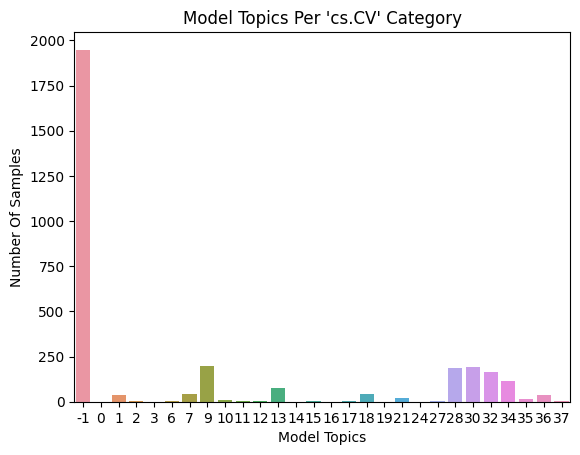

In [38]:
# visualize topics within "cs.CV" categoru
sns.barplot(
    x=topics_per_cs.index,
    y=topics_per_cs
)
plt.title("Model Topics Per 'cs.CV' Category")
plt.xlabel("Model Topics")
plt.ylabel("Number Of Samples");

- Summarize our answers to Q3 below, based on our analysis:
    - As "cs.CV" has large number of samples(it has 3105 samples), we expected that its samples will have many different topics.
    - label(-1) refers to samples don't belong to any topic, it represents the most of "cs.CV" samples.
    - So in the next step we will focus on this category(cs.CV) samples.

Question 4: Redo the topic modeling using the same method, but only on the papers tagged by the category you chcked in Q3. For instance, in Q3, you pick cs.CV, then in Q4, you first filter data by category = cs.CV and then apply the topic modeling on the selected documents.
Compare your topics found and your results from Q3. 

In [42]:
# filter the data to get samples with "cs.CV" category.
mask = df["categories"] == "cs.CV"
df_cs = df[mask]

- We will train the model on samples with "cs.CV" category only.

In [43]:
# now let's create a topic model using BERTopic 

# since we have quite a lot data points, let's start with a large topic number (50) and see how coherent are the learned topics.
topic_model = BERTopic(verbose=True, embedding_model="paraphrase-MiniLM-L6-v2", min_topic_size=150)
topics, _ = topic_model.fit_transform(df_cs["processed_text"].to_numpy()); len(topic_model.get_topic_info())

Batches:   0%|          | 0/98 [00:00<?, ?it/s]

2023-06-05 18:07:01,772 - BERTopic - Transformed documents to Embeddings
2023-06-05 18:07:11,636 - BERTopic - Reduced dimensionality
2023-06-05 18:07:11,862 - BERTopic - Clustered reduced embeddings


3

In [49]:
# explore the topics generated.
topic_model.get_topic_info().head()
topic_model.visualize_barchart()
topic_model.visualize_heatmap()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,703,-1_image_method_model_propose,"[image, method, model, propose, use, dataset, ...",[human body pose estimation hand detection imp...
1,0,2205,0_image_method_propose_model,"[image, method, propose, model, use, object, n...",[interested infer object segmentation leverage...
2,1,197,1_face_facial_recognition_image,"[face, facial, recognition, image, propose, us...",[work explore facial expression bias security ...


Summarize our answers to Q4 below, based on our analysis:

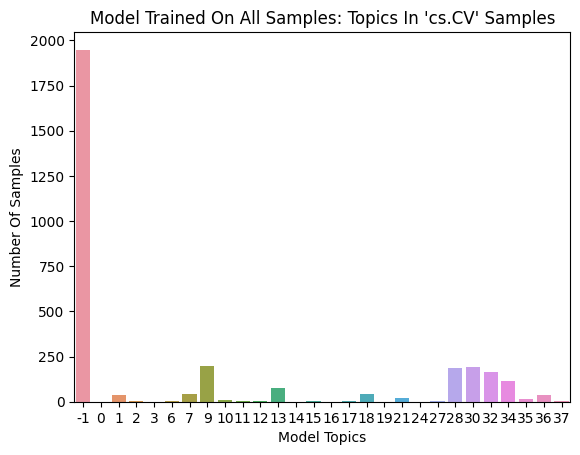

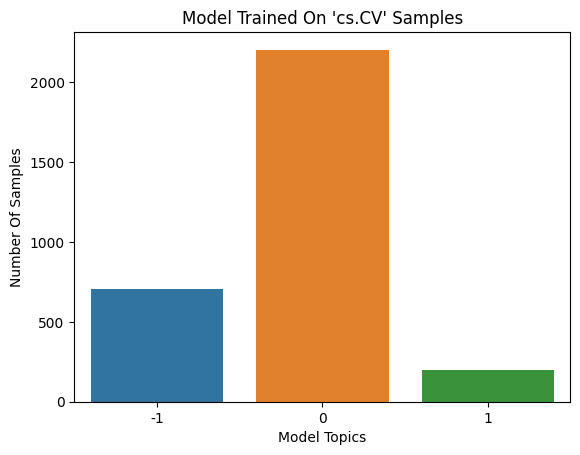

In [54]:
# comparing topics in "cs.CV" category in two cases(training with all data samples, training with samples of "cs.CV" category)

# training with all samples
sns.barplot(
    x=topics_per_cs.index,
    y=topics_per_cs
)
plt.title("Model Trained On All Samples: Topics In 'cs.CV' Samples")
plt.xlabel("Model Topics")
plt.ylabel("Number Of Samples")
plt.show();
# training with "cs.CV" category
sns.barplot(
    x=df_cs.value_counts(topics).index,
    y=df_cs.value_counts(topics)
)
plt.title("Model Trained On 'cs.CV' Samples")
plt.xlabel("Model Topics")
plt.ylabel("Number Of Samples")
plt.show();

- When we focused on samples with "cs.CV" category we got two topics, where topic(0) has most of samples(2205 samples).
- Label(-1) has small number of samples comparing with topic(0).
- the model(trained on cs.CV samples only) labels these samples well, as most of data belong to one topic(0)
- Comparing with model(trained on all data) labeled "cs.CV" samples in many topics, where label(-1) has most of samples.